# Competition Project : Classification of Sincere/Insincere Questions on Quora - Part 1

**Prepared by:** Daniel Han<br>
**Prepared for:** Brainstation

## 0. Contents

Below is a list of contents showing how this and the following notebooks documenting the project execution are structured:

1. Introduction<br>
2. Procedure<br>
3. Limitations and Assumptions<br>
4. References / Disclaimer<br>
5. Project Execution
    - 5.1 Data Acquisition and Cleaning
        - 5.1.1 Read In csv
        - 5.1.2 Basic Information about Data
    - 5.2 Data Transformation & Cleaning
        - 5.2.1 Tokenization
        - 5.2.2 Stopword Removal
        - 5.2.3 Lemmatization
        - 5.2.4 Combining to Function
    - 5.3 Exploratory Data Analysis (EDA)
        - 5.3.1 WordCloud
        - 5.3.2 Frequent Words in Sincere & Insincere Questions
        - 5.3.3 Relevant Words in Sincere & Insincere Questions
        - 5.3.4 Controversial Words in Sincere & Insincere Questions
    - 5.4 Data Vectorization
        - 5.4.1 Train-Test Split
        - 5.4.2 Downsampling
        - 5.4.3 Tf-Idf
        - 5.4.4 Word2Vec Encoding
    - 5.5 Standard Machine Learning Model Approach
        - 5.5.1 Base Models
        - 5.5.2 Pseudo-Hyperparameter-Optimization & Model/Input Vector Selection
        - 5.5.3 Pipeline & Hyperparameter Optimization
        - 5.5.4 Decision Threshold Optimization
        - 5.5.5 Model Evaluation
    - 5.6 Deep Learning Approach
        - 5.6.1 BERT Encoding
        - 5.6.2 Neural Network Construction & Optimization
        - 5.6.3 Model Evaluation
    - 5.7 Final Model Selection
        - 5.7.1 Model Comparison
        - 5.7.2 Prediction
        - 5.7.3 Inference

## 1. Introduction

Quora is a social question-and-answer website based in Mountain View, California, where users can collaborate by posting and editing questions, and answering those submitted by other users.

While the convenience that anyone can post and edit questions on the forum allows users to dynamically engage in the service, the downside is that some users may post insincere questions which would compromise the reliability of the website and/or degrade other groups of individuals.

In this hypothetical project, the characteristics of insincere questions on Quora are studied, and a classification model predicting whether or not a question in sincere is created based on the underlying logic and machine learning techniques.

## 2. Procedure

While the process of analysis and modelling were iterative, the following procedure was taken throughout:

**1. Data Acquisition:** Two sets of data are provided by Quora in csv format:


   - A train set of 1,306,122 questions on Quora along with the target variables indicating whether each of the questions was sincere or not. The classification model is trained based on this set;
   
   
   - A test set of 375,806 questions for the classification model to predict the sincerity of.
   
The data was made publicly available in the following link:
    https://www.kaggle.com/competitions/quora-insincere-questions-classification/data

**2. Data Transformation & Cleaning:** The texts of the questions in the training dataset are cleaned of special characters such as punctuations and contractions, and then tokenized. Subsequently, stopwords are removed from the tokenized document and each word is lemmatized. Finally, a function performing this cleaning is defined to automate the process of preparing a corpus for vectorization.

**3. Exploratory Data Analysis (EDA)**: The keywords relevant and frequently appearing in sincere and insincere questions are reviewed. Also, the appearance of certain controversial words in sincere and insincere questions are compared.

**4. Text Data Vectorization:** The tokenized dataset is vectorized to numerical matrices so that they can be fed into machine learning models. Two different algorithms are considered: Tf-Idf and Word2Vec Encoding. The vectorized dataset created using each algorithm is considered in the subsequent section. The dataset with the higher score is selected.

**5. Standard Machine Learning Models:** Some standard machine learning models including K-Nearest Neighbors, Random Forest, Logistic Regression, XGBoost, and Gaussian Naive Bayes, are considered for both input vectors. Then, the most optimal input-model pair (i.e., Tf-Idf or Word2Vec, and which of the aforementioned machine learning models) is decided. Then, hyperparameters and decision threshold are optimized on the input-model pair. Finally, the class label is predicted for the test set and its accuracy, precision, recall, and F-1 score are evaluated.  

**6. Deep Learning Approach**: The state-of-the-art technologies are used to retackle the problem. The documents in the corpus are tokenized and encoded using Huggingface's pretrained BERT model and a deep neural network is trained using the train class labels.

**7. Final Model Selection**: The standard machine learning package and deep learning model are compared based on their performances such as runtime and F-1 score. Then, the best performing model is selected as the final model.

## 3. Limitations and Assumptions

The limitations and assumptions are discussed throughout the documentation.

1. Due to the limited memory and computation power of the machine on which the project was executed, 50% of the entire dataset is used for machine learning.


2. This analysis depends solely on the dataset provided which only contains text data and no other information. Other factors, such as the location, time, or any other information about the people posting the questions, are not considered in this analysis.


3. Support Vector Machine was not considered in this analysis due to the excessively long runtime. Only the algorithms with reasonable runtimes were considered in this analysis.


4. Model performance is evaluated based on the execution time and F-1 score on the test set.


5. Hyperparameter optimization is conducted on the balanced set, while decision threshold is determined using the imbalanced validation set. For hyperparamete optimization, it is assumed that the hyperparameter maximizing the F-1 score on the balanced set also maximizes that on an imbalanced set.


6. Certain words frequently appearing in the insincere questions are referred to as 'controversial' throughout this analysis. Controversial words were defined as those appearing frequently in insincere questions and are related to a specific country or race, politician or political party, religion, sex, and sexual orientation. No personal bias is involved in this process. 

## 4. References / Disclaimer

This project was publicly posted by Quora on Kaggle, a data science competition platform (URL below): 

https://www.kaggle.com/competitions/quora-insincere-questions-classification

The classification modelling using Word2Vec, was referenced from the following source: https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381

No other competitors' work on this project was referenced during the execution and will not be through the future revisions this document.



## 5. Project Execution

This Section of the notebook documents the entire project execution process and discuss the findings.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### 5.1 Data Acquisition and Cleaning

#### 5.1.1 Read in csv

The provided train set is read in.

In [3]:
# Read in csv
df_full = pd.read_csv('train.csv', index_col = 0)

In [4]:
# Review DataFrame
df_full.head()

question_text  \
qid                                                                       
00002165364db923c7e6  How did Quebec nationalists see their province...   
000032939017120e6e44  Do you have an adopted dog, how would you enco...   
0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

                      target  
qid                           
00002165364db923c7e6       0  
000032939017120e6e44       0  
0000412ca6e4628ce2cf       0  
000042bf85aa498cd78e       0  
0000455dfa3e01eae3af       0

In [5]:
# For General Review and EDA, only Look at 5% of Data

from sklearn.model_selection import train_test_split

df, df_discard = train_test_split(df_full, test_size = 0.95, stratify = df_full['target'])

#### 5.1.2 Basic Information about Data

The dataframe is briefly reviewed as to its shape, datatypes, presence of null values (NaN), value counts, and duplicates.

In [6]:
# Review Shape
df.shape

(65306, 2)

In [7]:
# Review info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65306 entries, 5b948c7480a5cb91a381 to 1881efd724b2a3d69597
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question_text  65306 non-null  object
 1   target         65306 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


The datatypes are reasonable (object for question text column, int for the target column)

In [8]:
# Review NaN
df.isna().sum()

question_text    0
target           0
dtype: int64

In [9]:
# Review proportion of each value 
df.target.value_counts(normalize = True)

0    0.938137
1    0.061863
Name: target, dtype: float64

In [10]:
# Review proportions of the target values
print(f'Approximately {round(df.target.mean() * 100, 2)} % of the entire question set are insincere questions.')

Approximately 6.19 % of the entire question set are insincere questions.


It must be noted that this data set is imbalanced. That is, most of the target variables correspond to 0 (i.e., insincere) while some correspond to 1 (i.e., sincere). This class imbalance must be handled in the following two ways:

1. The dataset must be resampled (either by oversampling, understampling or Synthetic Minority Oversampling TEchnique (SMOTE))


2. Instead of reviewing the test set accuracy, other parameters such as precision, recall or F-1 score must be reviewed which are more indicative of the model's sensitivity to insincere (i.e., positive) classes.


In [11]:
# Check duplicated rows
print(f'There are {df.duplicated().sum()} duplicated rows.')

There are 0 duplicated rows.


In [12]:
# Separate dataframe into dependant and independant variables
X = df.iloc[:, :-1]['question_text']
y = df.iloc[:, -1]

### 5.2 Data Transformation & Cleaning

#### 5.2.1 Tokenization

The text data is tokenized using the Genism library

In [13]:
# Import Genism library
import gensim

In [14]:
# Review what gensim's simple_preprocess does
tokenized = gensim.utils.simple_preprocess("I am demonstrating an example sentence 123. It's n!ce isn't it?")
tokenized

['am', 'demonstrating', 'an', 'example', 'sentence', 'it', 'ce', 'isn', 'it']

Gensim's simple preprocessor does the following things:

1. It returns a list of lowercased substrings.
2. Any 1-character long words such as 'I' are removed.
3. Any number or special character is removed.
4. Stopwords such as 'an' or 'it' are **not** removed.
5. **No** lemmatization is performed. For example, the word 'demonstrating' is returned without being corrected to its root word 'demonstrate'.

#### 5.2.2 Stopword Removal

The list of tokenized words are removed of stopwords. NLTK and SpaCy libraries are used to create a set of stopwords. 

In [15]:
# The following code is only required if nltk packages are not already installed.
# import nltk
# nltk.download()

In [16]:
# Import libraries
from nltk.corpus import stopwords
import spacy

In [17]:
# Loading stopwords from spacy
stopwords_spacy=spacy.load("en_core_web_sm").Defaults.stop_words

# Loading stopwords from NLTK
stopwords_nltk = stopwords.words('english')

In [18]:
# combining the stopword list
combined_stopwords = set((set(stopwords_spacy)|set(stopwords_nltk)))

# Display random stopwords
list(np.random.choice(list(combined_stopwords), 10))

['whereupon',
 'which',
 'myself',
 'too',
 'yet',
 'hereby',
 'nothing',
 "haven't",
 'must',
 'someone']

In [19]:
# From the tokenized list above
tokenized_no_stopwords = [] # Create a list of new words (clenan of stopwords)
for i in tokenized: # For each token in the list
    if i not in combined_stopwords: # If the token is not a stopword
        tokenized_no_stopwords.append(i) # Add to the list of new words

# Display new tokens, now clean of stopwords
tokenized_no_stopwords

['demonstrating', 'example', 'sentence', 'ce']

It can be seen that some stopwords such as 'am' and 'an' have been removed.

#### 5.2.3 Lemmatization

Lemmatizer is created using the SpaCy library

In [20]:
# Create Lemmatizer from SpaCy Library
lemmatizer = spacy.load('en_core_web_sm', disable = ['parser','ner'])

# Sample Text
text = "I am demonstrating an example of lemmatization"

# Convert to SpaCy's Tokens.doc.Doc object, which is an iterator
doc = lemmatizer(text)

print(doc) # You can print this Tokens.doc.Doc object as if a string
print(f'The datatype of the above variable is {type(doc)}') # Printing the data type

# Conduct lemmatization
[token.lemma_ for token in doc] # Lemmatize for each token in the interator

I am demonstrating an example of lemmatization
The datatype of the above variable is <class 'spacy.tokens.doc.Doc'>


['I', 'be', 'demonstrate', 'an', 'example', 'of', 'lemmatization']

In [21]:
# Create the stopword-free tokenized list into a string
tokenized_no_stopwords_string = " ".join(tokenized_no_stopwords)

# Convert to SpaC's Tokens.doc.Doc object, which is an iterator
sample_doc = lemmatizer(tokenized_no_stopwords_string)

# Lemmatize for each token in the Doc object
final_list = [token.lemma_ for token in sample_doc]

# Display result
final_list

['demonstrate', 'example', 'sentence', 'ce']

It can be seen that the word 'demonstrating' from the tokenized string has been lemmatized to 'demonstrate'.

#### 5.2.4 Combining to Function

In [22]:
# Create a custom tokenizer
def custom_tokenizer(text: str):
    
# Step 1 - Tokenization
    
    # tokenize given string using Gensim's preprocessor
    tokenized = gensim.utils.simple_preprocess(text) # This returns a list of strings
    
# Step 2 - Stopword Removal
    
    # Create an empty list of non-stopwords
    tokenized_no_stopwords = []

    # Loop over the tokenized list of strings and add only non-stopwords to the empty list above
    for i in tokenized:
        if i not in combined_stopwords:
            tokenized_no_stopwords.append(i) # At the end of this for loop, a list of strings is returned
    
# Step 3 - Lemmatization
    
    # Create an instance of SpaCy.Token.doc.Doc using the stopword-removed list of strings
    doc = lemmatizer(' '.join(tokenized_no_stopwords))
    
    # Create a final lsist, which should contain all lemmatized, non-stopwords, without any numerical or special characters.
    final_string = [token.lemma_ for token in doc]
    
    return final_string

In [23]:
custom_tokenizer('My name is Dan!el HAn, and I like to STUDY machine learning whenever I am bored.')

['dan', 'el', 'han', 'like', 'study', 'machine', 'learning', 'bore']

In [24]:
# Apply function to all elements in text column 
df['question_text'] = df.question_text.apply(custom_tokenizer).apply(lambda x : ' '.join(x))

In [25]:
# Review final column to be analyzed/modelled
df.head()

question_text  target
qid                                                                
5b948c7480a5cb91a381        nda scoring math gat letter nda       0
0e3779d041f1c65f4174          long roulette table existence       0
b6c64aa381da56fe5f62                good brand mosquito net       0
8cbae4efe5386eda6d0d  alternative typical pc game aesthetic       0
02fedd36c269041b822c                hardwood tree grow west       0

### 5.3 Exploratory Data Analysis (EDA)

#### 5.3.1 Wordcloud

A wordcloud showing the words closely associated with sincere and insincere questions.

In [26]:
# Import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

#### Wordcloud of Sincere Questions

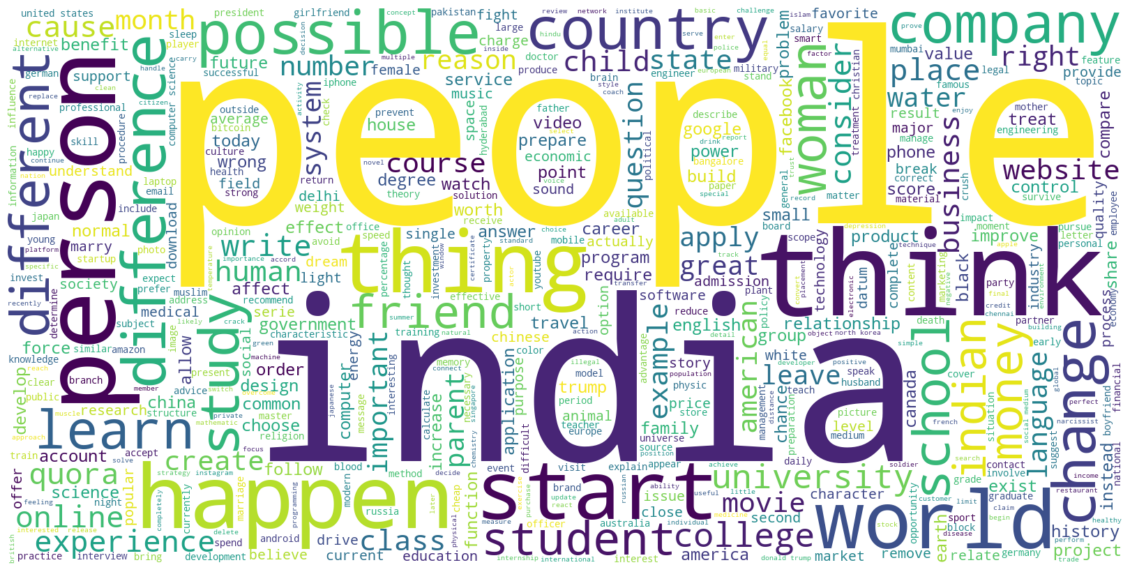

In [27]:
# Wordcloud of sincere questions
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5,background_color='white').generate(" ".join(df[df.target == 0].question_text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')
plt.show()

#### Wordcloud for Insincere Questions

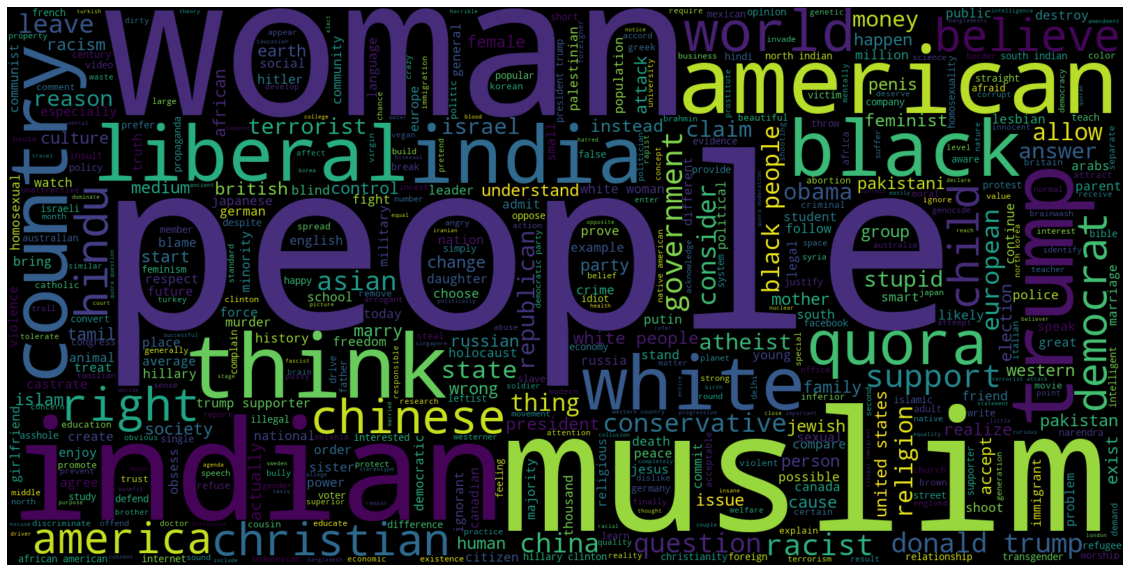

In [28]:
# Wordcloud of insincere questions
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5,background_color="black").generate(" ".join(df[df.target == 1].question_text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')
plt.show()

#### 5.3.2 Bag-of-Word & Word Count

The 50 most frequently-occurring words in sincere and insincere questions are reviewed using bag-of-words. While vectorizing the entire train set would be prudent, doing so will result in an unrealistically long execution time. It is therefore assumed that reviewing the word count on a 5% subset will adequately represent the entire dataset.

In [29]:
# Import Scikit Learn Library
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# Instantiate a bag-of-word model. Use 2-gram
bow = CountVectorizer(min_df = 5, tokenizer = custom_tokenizer, ngram_range = (1,3))

In [31]:
# Fit the vectorizor on the train set
bow.fit(X)

CountVectorizer(min_df=5, ngram_range=(1, 3),
                tokenizer=<function custom_tokenizer at 0x0000024A16616EF0>)

In [32]:
# Create a sparse matrix of word counts
X_bow = bow.transform(X)

In [33]:
# Convert sparse matrix to dense array
dense_array_bow = X_bow.toarray()

In [34]:
# Random words
np.random.choice(bow.get_feature_names(), 10)

array(['orphan', 'await', 'singularity', 'night stand', 'problem face',
       'worship', 'black man', 'filing', 'job good', 'wear black'],
      dtype='<U32')

Now, the dataset is divided into two - Sincere and Insincere questions. Then, the words frequently appearing in each type of question is reviewed.

In [35]:
# Create a series of sincere words
sincere_word_count_bow = pd.Series(dense_array_bow[y == 0].sum(axis = 0), index = bow.get_feature_names())

In [36]:
# Import Plotly
import plotly.express as px

In [37]:
# Top 50 words appearing in sincere questions 
top_50_sincere_bow = sincere_word_count_bow.sort_values(ascending = False)[:50]

# Plot using Plotly
fig = px.bar(x = top_50_sincere_bow.index, y = top_50_sincere_bow.values)
fig.update_layout(title = 'Top 50 Words Most Frequently Appearing in  Sincere Questions',
                 xaxis_title = 'Word(s)', yaxis_title = 'Frequency')
fig.show()

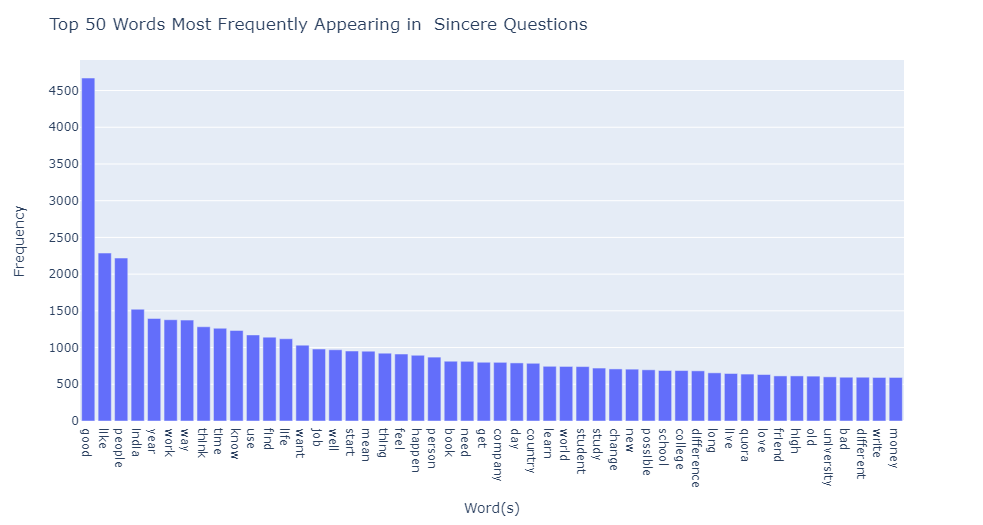

In [38]:
# Create a series of insincere words
insincere_word_count_bow = pd.Series(dense_array_bow[y == 1].sum(axis = 0), index = bow.get_feature_names())

In [39]:
# Top 50 words appearing in insincere questions 
top_50_insincere_bow = insincere_word_count_bow.sort_values(ascending = False)[:50]

# Plot using Plotly
fig = px.bar(x = top_50_insincere_bow.index, y = top_50_insincere_bow.values)
fig.update_layout(title = 'Top 50 Words Most Frequently Appearing in  Inincere Questions',
                 xaxis_title = 'Word(s)', yaxis_title = 'Frequency')
fig.show()

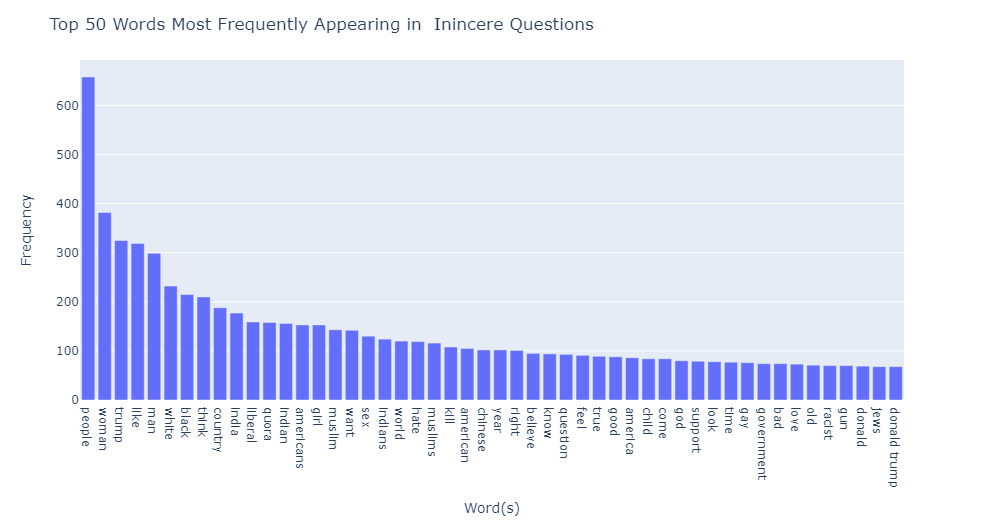

Among the top frequently-occurring and relevant kerywords in insincere questions,

- 7 were related to a particular country (India, Indian, Indians, America, American, Amaricans, Chinese),
- 4 were related to politics, politician, or a political party or view (Trump, Liberal, Donald, Donald Trump)
- 2 were racial (white, black)
- 4 were related to religions (Muslim, Muslims, Jews, God)
- 6 were related to a certain sex, gender, or sexual orientation (woman, man, girl, sex, gay, guy)
- 3 were related to hatred and violence (hate, kill, gun)

The frequencies of words in the categories in sincere questions are as follows:

- 1 related to a particular country (India)
- 0 related to politics, politician, or a political party or view
- 0 racial
- 0 related to religions
- 1 related to a certain sex, gender, or sexual orientation (girl)
- 0 related to hatred and violence

In sincere questions, the following were observed:

- The word 'good' is the most frequent word, and other words in a similar context such as well, bad, difference, help are also among the top 50 - it is likely that people frequently compare multiple options and would like to be recommended the best.

- 11 were related to education and career (work, job, student, college, school, learn, book, study)

#### 5.3.3 Tf-Idf & Relevant words

Following the bag-of-words method, the term-frequency-inverse-document-frequecy (TF-IDF) analysis is conducted to evaluate and store the relevance of the words in a review as well.

In [40]:
# Import TF-IDF library
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# Instantiate a Tf-Idf model
tfidf = TfidfVectorizer(min_df = 5, tokenizer = custom_tokenizer, ngram_range = (1,3))

In [42]:
# Fit the vectorizor on the train set
tfidf.fit(X)

TfidfVectorizer(min_df=5, ngram_range=(1, 3),
                tokenizer=<function custom_tokenizer at 0x0000024A16616EF0>)

In [43]:
# Transform train set to assign Tf-Idf Scores
X_tfidf = tfidf.transform(X)

In [44]:
# Convert sparse matrix to dense array
dense_array_tfidf = X_tfidf.toarray()

In [45]:
# Random words
np.random.choice(tfidf.get_feature_names(), 10)

array(['custom', 'surat', 'tourist attraction', 'barne', 'truck driver',
       'd', 'upright', 'app', 'possible person', 'sore throat'],
      dtype='<U32')

Now, the dataset is divided into two - Sincere and Insincere questions. Then, the most relevant words in each type of question is reviewed.

In [46]:
# Create a series of sincere words
sincere_word_count_tfidf = pd.Series(dense_array_tfidf[y == 0].mean(axis = 0), index = tfidf.get_feature_names())

In [47]:
top_50_sincere_tfidf = sincere_word_count_tfidf.sort_values(ascending = False)[:50]

fig = px.bar(x = top_50_sincere_tfidf.index, y = top_50_sincere_tfidf.values)
fig.update_layout(title = 'Top 50 Words Most Relevant Words in  Sincere Questions',
                 xaxis_title = 'Word(s)', yaxis_title = 'Mean Tf-Idf Score')
fig.show()

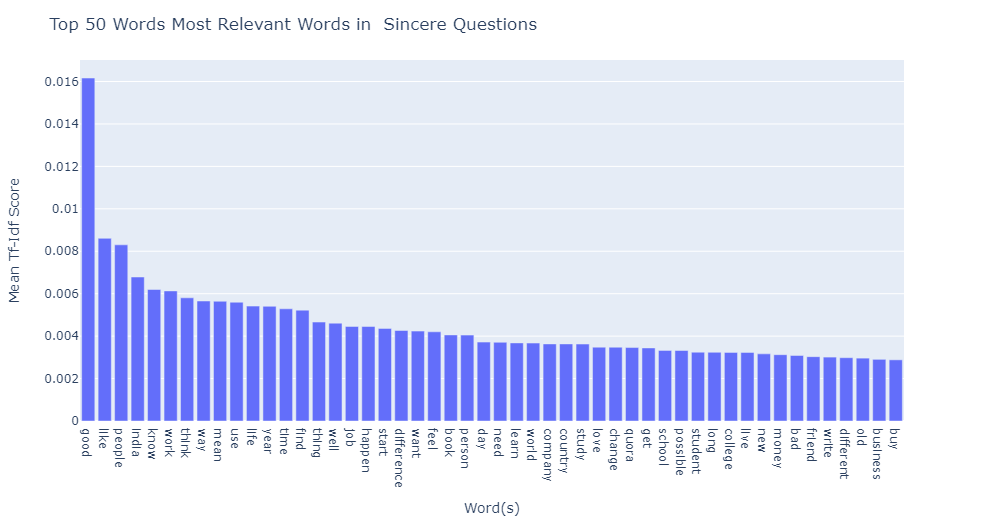

In [48]:
# Create a series of sincere words
insincere_word_count_tfidf = pd.Series(dense_array_tfidf[y == 1].mean(axis = 0), index = tfidf.get_feature_names())

In [49]:
top_50_insincere_tfidf = insincere_word_count_tfidf.sort_values(ascending = False)[:50]

fig = px.bar(x = top_50_insincere_tfidf.index, y = top_50_insincere_tfidf.values)
fig.update_layout(title = 'Top 50 Words Most Relevant Words in  Insincere Questions',
                 xaxis_title = 'Word(s)', yaxis_title = 'Mean Tf-Idf Score')
fig.show()

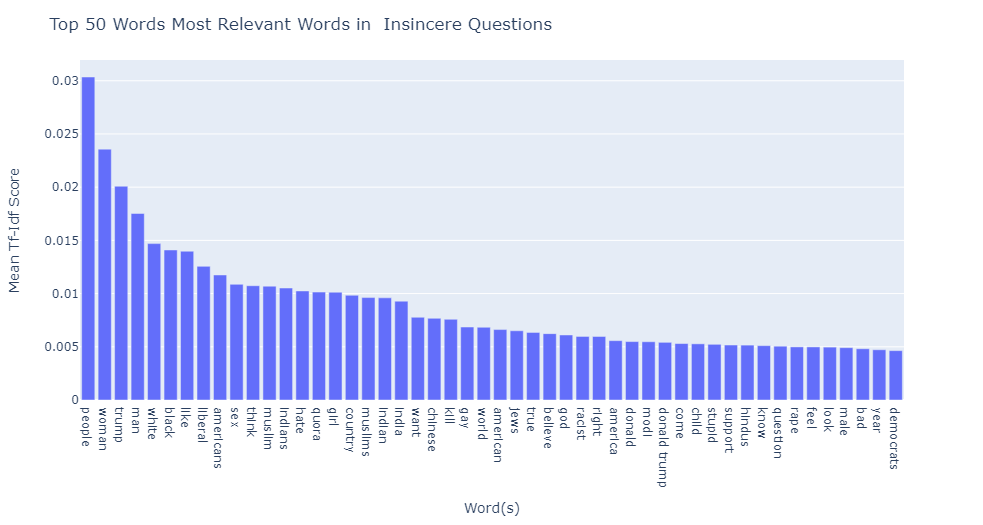

Similar results are observed using the Tf-Idf method.

#### 5.3.4 Probability of Finding Controversial Words

##### Probability of Controversial Words in Sincere / Insincere Questions

Using the controversial keywords observed in insincere questions, the probabilities of finding such keywords in sincere and insincere questions are compared. Also, the z-scores and p-values associated with the proportions z-test between the two observations are computed and displayed.

In [50]:
# Add keywords to review
keywords = ['indian', 'american', 'chinese', 'trump', 'liberal', 'donald', 'white', 'black', \
            'muslim', 'jews', 'god', 'woman', 'man', 'girl', 'sex', 'gay', 'guy', 'hate', 'kill', 'gun']

In [51]:
# Import Plotly Graph Objects and subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [52]:
# This function checks whether a certain keyword appears in a question text
def word_in_text(word: str, text: str):
    if word in text.split():
        return True
    else:
        return False

In [53]:
# Import statsmodels proportion_z_test
from statsmodels.stats.proportion import proportions_ztest

In [54]:
# Create a list of keywords with the first letter capitalized for subplot titles
keyword_upper = []

for i in range(len(keywords)):
    newstring = keywords[i][0].upper() + keywords[i][1:]
    keyword_upper.append(newstring)

# Total numbers of rows and columns 
total_cols = 3
total_rows = len(keywords) // total_cols + 1 if len(keywords) // total_cols != 0 else len(keywords) // total_cols

# Create a figure of subplots
fig = make_subplots(rows=total_rows, cols=total_cols, subplot_titles = keyword_upper)

# Loop over each keyword and plot percentages of sincere/insincere questions containing the keyword 
for i in range(len(keywords)):
    
    # Whether keyword exists in DataFrame of sincere questions (True or False)
    sincere_appearance = df.loc[df['target'] == 0,'question_text'].apply(lambda x : word_in_text(keywords[i], x))
    # Proportion of sincere questions containing keyword in DataFrame
    sincere_proportion = sincere_appearance.mean()
    # Count of all sincere questions containing keyword
    count_sincere = sincere_appearance.sum()
    # Count of all sincere questions
    nobs_sincere = len(sincere_appearance)
    
    # Whether keyword exists in DataFrame of insincere questions (True or False)
    insincere_appearance = df.loc[df['target'] == 1,'question_text'].apply(lambda x : word_in_text(keywords[i], x))
    # Proportion of insincere questions containing keyword in DataFrame
    insincere_proportion = insincere_appearance.mean()
    # Count of all insincere questions containing keyword
    count_insincere = insincere_appearance.sum()
    # Count of all insincere questions
    nobs_insincere = len(insincere_appearance)
    
    # Create traces
    trace_sincere = go.Bar(x = [0.5], y = [sincere_proportion], 
                             marker_color='lightsalmon')    
    trace_insincere = go.Bar(x = [1.5], y = [insincere_proportion], 
                             marker_color='crimson')
    
    # Calculate Z scores and p-values
    count = np.array([count_sincere, count_insincere]) # total counts
    nobs = np.array([nobs_sincere, nobs_insincere]) # number of observations
    z, p = proportions_ztest(count, nobs)
    
    # Row & column numbers
    num_row = ((i + 1) // total_cols) + 1 if (i + 1) % total_cols != 0 else (i + 1) // total_cols
    num_col = total_cols if (i + 1) % total_cols == 0 else (i + 1) % total_cols
    
    # Append traces
    fig.append_trace(trace_sincere, row = num_row, col = num_col)
    fig.append_trace(trace_insincere, row = num_row, col = num_col)
    
    # Axis formatting for each subplot
    fig.update_xaxes(title_text = f'Sincerity(z = {round(z, 1)}, p = {round(p, 3)})', tickvals = [0.5, 1.5], ticktext = ['Sincere', 'Insincere'],
                     row = num_row, col = num_col)
    fig.update_yaxes(title_text = 'Percentage', title_standoff = 0, tickformat = ',.1%',
                     row = num_row, col = num_col)

# Global formatting
fig.update_layout(height=2000, width=1000, showlegend = False, title = 'Percentages of Sincere/Insincere\
 Questions Containing Keyword in Question')

# Show
fig.show()

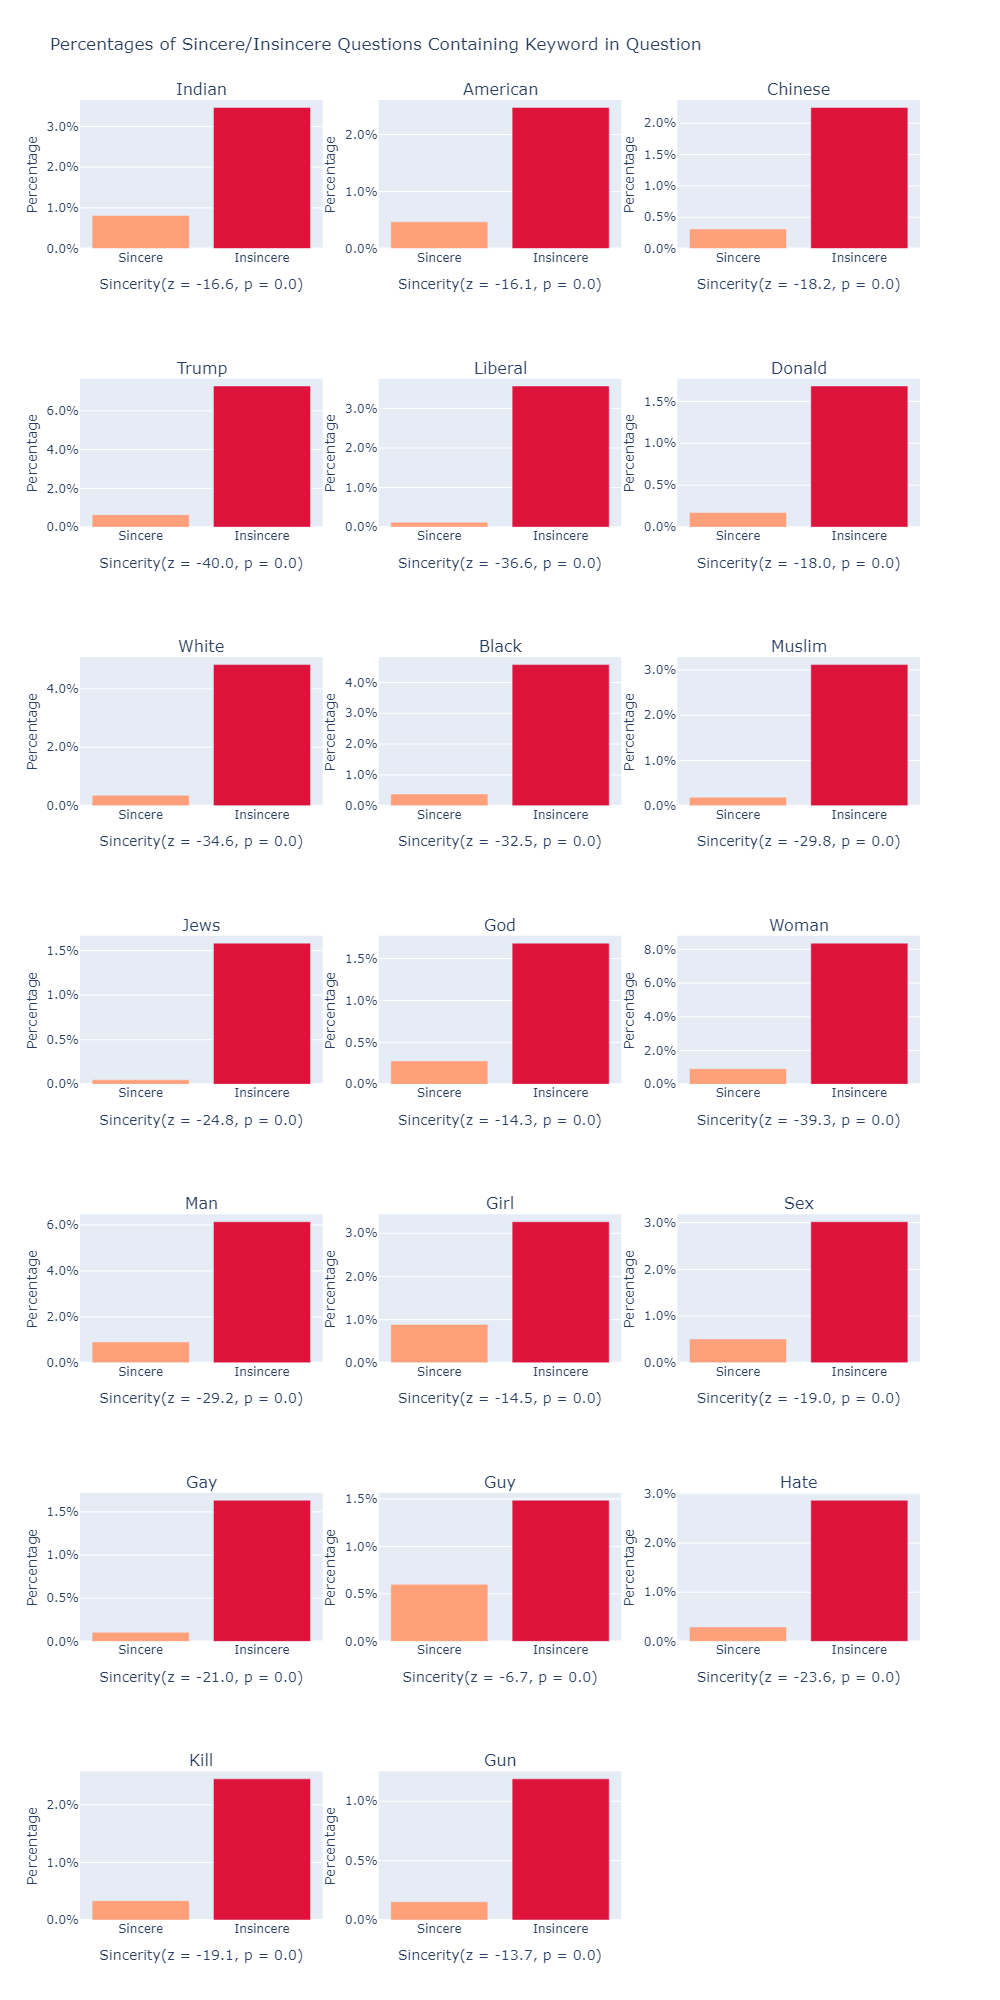

Visually, the controversial keywords appear noticeably more frequently in insincere questions than in sincere questions. The z-scores shown in the graph are large, and p-values all less than 0.05 (the typical significance level) which indicate that, assuming there is no difference in proportion, the probability of observing the difference is very low.

##### Probability of Finding Random Words in Sincere / Insincere Questions

To compare these z-scores of the keywords against those of other words, the same procedure is repeated with randomly drawn words.

In [55]:
# Import random library
import random

In [56]:
# Fix random seed so that consistent result can be illustrated in this notebook
random.seed(1230)

# Create a dictionary of English words
vocab = list(spacy.load("en_core_web_sm").vocab.strings)

# Draw random words
random_words = random.choices(vocab, k = 10)

In [57]:
# Create a new set of keywords, all lowercased
keywords = []
for i in random_words:
    new_lower = i.lower()
    keywords.append(new_lower)

In [58]:
# Show randomly drawn words
print(keywords)

['escalation', 'umlaut', 'cheerfully', 'choosing', 'kern', 'godot', 'bent', 'disruptions', 'grumbles', 'studio']


In [59]:
# Create a list of keywords with the first letter capitalized for subplot titles
keyword_upper = []

for i in range(len(keywords)):
    newstring = keywords[i][0].upper() + keywords[i][1:]
    keyword_upper.append(newstring)

# Total numbers of rows and columns 
total_cols = 3
total_rows = len(keywords) // total_cols + 1 if len(keywords) // total_cols != 0 else len(keywords) // total_cols

# Create a figure of subplots
fig = make_subplots(rows=total_rows, cols=total_cols, subplot_titles = keyword_upper)

# Loop over each keyword and plot percentages of sincere/insincere questions containing the keyword 
for i in range(len(keywords)):
    
    # Whether keyword exists in DataFrame of sincere questions (True or False)
    sincere_appearance = df.loc[df['target'] == 0,'question_text'].apply(lambda x : word_in_text(keywords[i], x))
    # Proportion of sincere questions containing keyword in DataFrame
    sincere_proportion = sincere_appearance.mean()
    # Count of all sincere questions containing keyword
    count_sincere = sincere_appearance.sum()
    # Count of all sincere questions
    nobs_sincere = len(sincere_appearance)
    
    # Whether keyword exists in DataFrame of insincere questions (True or False)
    insincere_appearance = df.loc[df['target'] == 1,'question_text'].apply(lambda x : word_in_text(keywords[i], x))
    # Proportion of insincere questions containing keyword in DataFrame
    insincere_proportion = insincere_appearance.mean()
    # Count of all insincere questions containing keyword
    count_insincere = insincere_appearance.sum()
    # Count of all insincere questions
    nobs_insincere = len(insincere_appearance)
    
    # Create traces
    trace_sincere = go.Bar(x = [0.5], y = [sincere_proportion], 
                             marker_color='lightsalmon')    
    trace_insincere = go.Bar(x = [1.5], y = [insincere_proportion], 
                             marker_color='crimson')
    
    # Calculate Z score
    count = np.array([count_sincere, count_insincere])
    nobs = np.array([nobs_sincere, nobs_insincere]) 
    z, p = proportions_ztest(count, nobs)
    
    # Row & column numbers
    num_row = ((i + 1) // total_cols) + 1 if (i + 1) % total_cols != 0 else (i + 1) // total_cols
    num_col = total_cols if (i + 1) % total_cols == 0 else (i + 1) % total_cols
    
    # Append traces
    fig.append_trace(trace_sincere, row = num_row, col = num_col)
    fig.append_trace(trace_insincere, row = num_row, col = num_col)
    
    # Axis formatting for each subplot
    fig.update_xaxes(title_text = f'Sincerity(z = {round(z, 1)}, p = {round(p, 3)})', tickvals = [0.5, 1.5], ticktext = ['Sincere', 'Insincere'],
                     row = num_row, col = num_col)
    fig.update_yaxes(title_text = 'Percentage', title_standoff = 0, tickformat = ',.3%',
                     row = num_row, col = num_col)

# Global formatting
fig.update_layout(height=1000, width=1000, showlegend = False, title = 'Percentages of Sincere/Insincere\
 Questions Containing Keyword in Question')

# Show
fig.show()

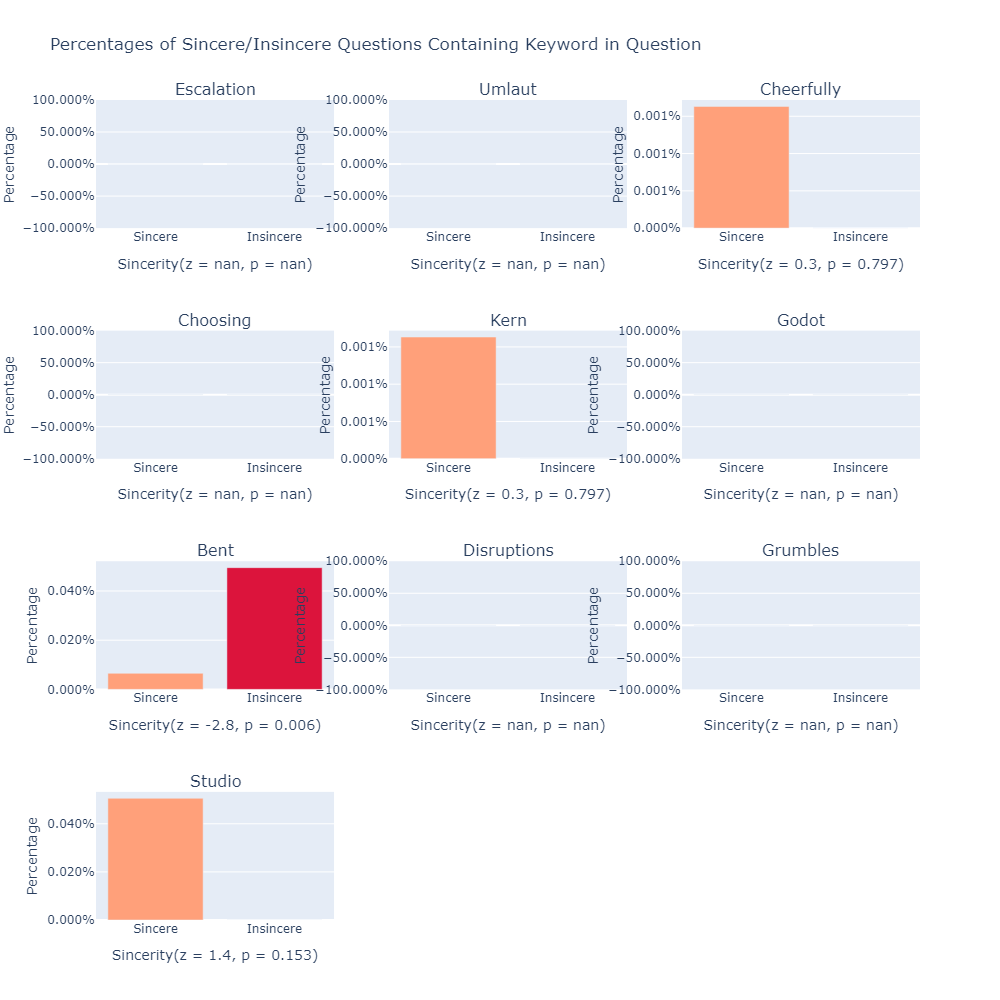

Unlike the controversial words, some words appear in relatively more similar proportions between the insincere and sincere questions, and the corresponding z-scores are high. This verifies that the controversial keywords previously observed are associated with the insincerity of a question.